In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Cargar el conjunto de datos de Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Filtrar las clases para tener un problema de clasificación binaria
df = df[df['species'] != 2]
df['species'] = df['species'].apply(lambda x: 1 if x == 1 else 0)

# Mostrar las primeras filas del conjunto de datos
print(df.head())
print(len(df))

# Selección de características y variable objetivo
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['species']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
100


In [8]:
# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


LogisticRegression()

In [9]:
# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Métricas de evaluación
print(f"Precisión en entrenamiento: {accuracy_score(y_train, y_train_pred)}")
print(f"Precisión en prueba: {accuracy_score(y_test, y_test_pred)}")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_test_pred))
print("Informe de clasificación:")
print(classification_report(y_test, y_test_pred))


Precisión en entrenamiento: 1.0
Precisión en prueba: 1.0
Matriz de confusión:
[[6 0]
 [0 4]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



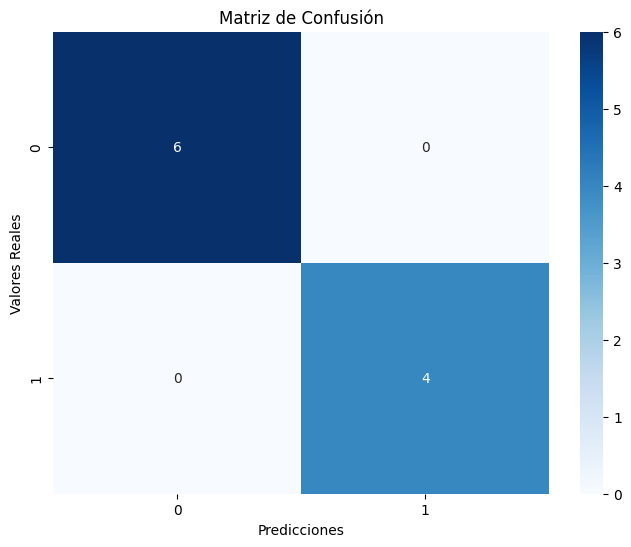

In [10]:
# Gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()
